In [1]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

In [10]:
# Whole config
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))
row = 3
col = 1

<Figure size 691.2x518.4 with 0 Axes>

In [2]:
# [0, 10]
delta = 0.001
start = 0
stop = 10 + delta
step = 0.5
x = np.arange(start, stop+delta, step)

In [3]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [5]:
#Triangular membership function
x1 = np.arange(0,5+delta, step)
trimf = fuzz.trimf(x1, [0,2.5,5])

In [7]:
# Trapezoidal membership function
x2 = np.arange(4,10+delta,step)
trapmf = fuzz.trapmf(x2, [4,6,8,10])

* **Fuzzy Logic**

In [9]:
#fuzzy logic
tri_not = fuzz.fuzzy_not(trimf)
trap_not = fuzz.fuzzy_not(trapmf)

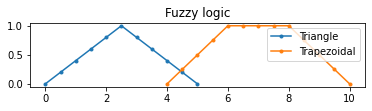

In [12]:
plt.subplot(row, col, 1)
plt.title("Fuzzy logic")
plt.plot(x1, trimf, label="Triangle", marker=".")
plt.plot(x2, trapmf, label="Trapezoidal", marker=".")

plt.legend(loc="upper right")

* **Fuzzy NOT**

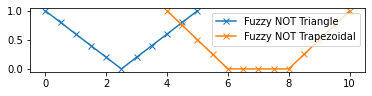

In [18]:
plt.subplot(row, col, 2)
plt.plot(x1, tri_not, label="Fuzzy NOT Triangle", marker="x")
plt.plot(x2, trap_not, label="Fuzzy NOT Trapezoidal", marker="x")
plt.legend(loc="upper right")

* **Fuzzy AND / OR**

In [15]:
x3, tri_trap_and = fuzz.fuzzy_and(x1,trimf, x2, trapmf)
x3, tri_trap_or = fuzz.fuzzy_or(x1, trimf, x2, trapmf)

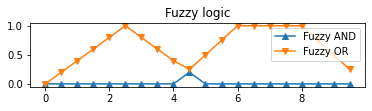

In [14]:
plt.subplot(row, col, 1)
plt.title("Fuzzy logic")
plt.plot(x3, tri_trap_and, label="Fuzzy AND", marker="^")
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.legend(loc="upper right")

* **Defuzzification**

In [16]:
centroid_x = fuzz.defuzz(x3, tri_trap_or,'centroid')
centroid_y = fuzz.interp_membership(x3, tri_trap_or, centroid_x)

bisector_x = fuzz.defuzz(x3, tri_trap_or, "bisector")
bisector_y = fuzz.interp_membership(x3, tri_trap_or, bisector_x)

mom_x = fuzz.defuzz(x3, tri_trap_or, "mom")
mom_y = fuzz.interp_membership(x3, tri_trap_or, mom_x)

som_x = fuzz.defuzz(x3, tri_trap_or, "som")
som_y = fuzz.interp_membership(x3, tri_trap_or, som_x)

lom_x = fuzz.defuzz(x3,tri_trap_or,"lom")
lom_y = fuzz.interp_membership(x3, tri_trap_or, lom_x)

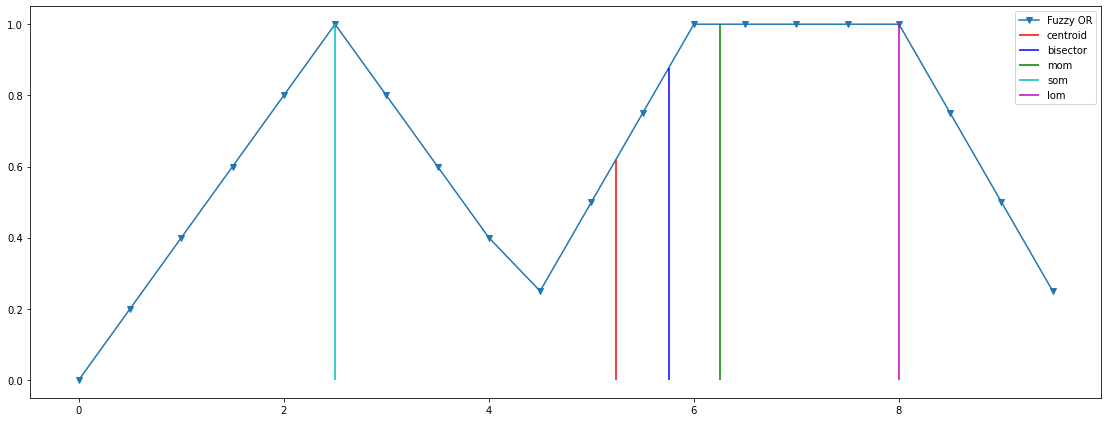

In [24]:
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale*2, 4.8 * fig_scale))
#Fuzzy FOR
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.vlines(centroid_x, 0.0, centroid_y, label="centroid", color="r")
plt.vlines(bisector_x, 0.0, bisector_y, label="bisector", color="b")
plt.vlines(mom_x, 0.0, mom_y, label="mom", color="g")
plt.vlines(som_x, 0.0, som_y, label="som", color="c")
plt.vlines(lom_x, 0.0, lom_y, label="lom", color="m")
plt.legend(loc="upper right")